# Methods for Dealing with Imbalanced Data

Never test on the oversampled or undersampled dataset.
If we want to implement cross validation, remember to oversample or undersample your training data during cross-validation, not before!
Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
 filename = 'creditcard.csv'

In [5]:
df = pd.read_csv(filename)
print("Done")

Done


In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Imbalance Study

Why do we create a sub-Sample?
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:
Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.
Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

In [4]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [68]:
df['Class'].value_counts()[1]# count of frauds

492

In [69]:
df['Class'].value_counts()[0]# count of No-frauds

284315

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

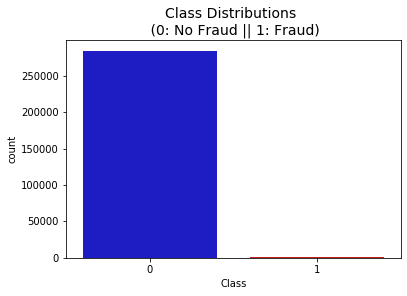

In [5]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# Splitting the Data (Original DataFrame)

Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [6]:
train, test = train_test_split(df,test_size=0.3,random_state=42)

In [15]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 

# METHODS FOR DEALING WITH IMBALANCED DATA

# 1-Random Under-Sampling:

In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

In [16]:
from sklearn.utils import resample

major_class = train[train.Class==0]
minority_class = train[train.Class==1]
down_class = resample(major_class,replace=False, n_samples=len(minority_class), random_state=27)
downsampled_data = pd.concat([down_class, minority_class])

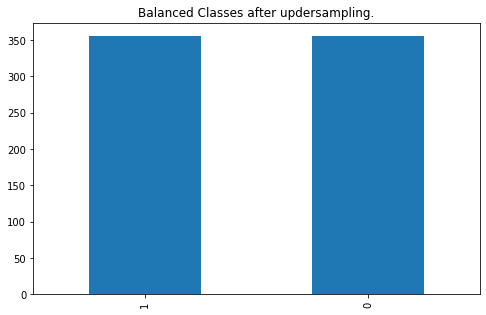

In [17]:
plt.figure(figsize=(8, 5))
t='Balanced Classes after updersampling.'
downsampled_data.Class.value_counts().plot(kind='bar', title=t)

# 2-Random Oversampling of the Majority Class

In [12]:
major_class = train[train.Class==0]
minority_class = train[train.Class==1]
upsampled_class = resample(minority_class,replace=True,n_samples=len(major_class),random_state=27)
upsampled_data = pd.concat([major_class, upsampled_class])

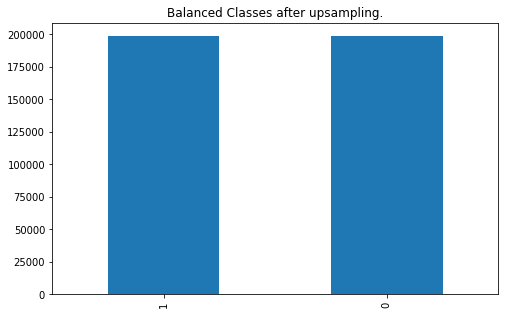

In [13]:
plt.figure(figsize=(8, 5))
t='Balanced Classes after upsampling.'
upsampled_data.Class.value_counts().plot(kind='bar', title=t)

# 3- Oversampling using Synthetic Data: SMOTE

SMOTE stands for Synthetic Minority Oversampling TEchnique, and it is an alternative to random oversampling. How does it works? Well, it merges two ideas we have deepen so far: random sampling and
k-nearest neighbours. Indeed, SMOTE allows to create new data from the minority class (they are not copy of the observed one, as in random resampling), and automatically computes the k-nns for those points. The synthetic points are added between
the chosen point and its neighbors.
"https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png",

Understanding SMOTE:

Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

In [1]:
#install package
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
Note: you may need to restart the kernel to use updated packages.


In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_sample(X_train, y_train)
X_smote = pd.DataFrame(X_smote, columns=X_train.columns )
y_smote = pd.DataFrame(y_smote, columns=['Class'])
smote_data = pd.concat([X_smote,y_smote],axis=1)

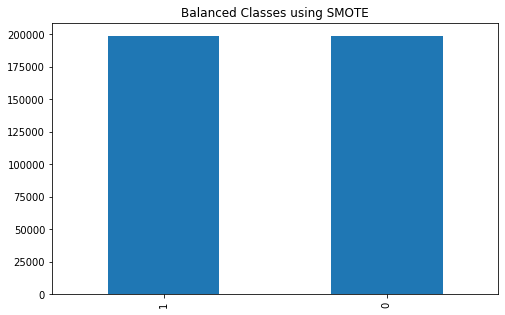

In [17]:
plt.figure(figsize=(8, 5))
title='Balanced Classes using SMOTE'
smote_data.Class.value_counts().plot(kind='bar', title=title)

# shuffle the data

In [ ]:
#Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

# Correlation Matrices¶

In [ ]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


######
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction. Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.